In [7]:
import pandas as pd
from sklearn import cluster

In [2]:
# Data source: https: //www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset
# Data loading code: https://www.kaggle.com/code/wirachleelakiatiwong/travel-review-analysis
cat = """user
churches
resorts
beaches
parks
theatres
museums
malls
zoo
restaurants
pubs/bars
local services
burger/pizza shops
hotels/other lodgings
juice bars
art galleries
dance clubs
swimming pools
gyms
bakeries
beauty & spas
cafes
view points
monuments
gardens"""
columns_list = cat.split("\n")
df = pd.read_csv('../livecoding-data/g_travel_ratings.csv', header=0, names=columns_list, index_col=False)
df = df.set_index('user')

/var/folders/hw/7q05z4zd6h99k8hlq1ws2wtr0000gq/T/ipykernel_38660/1374819383.py:28: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('../livecoding-data/g_travel_ratings.csv', header=0, names=columns_list, index_col=False)


In [6]:
df

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


In [10]:
df.info() # One object column needs to be dealt with

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [18]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce') # Non-numerics become NaN

In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5454 non-null   float64
 1   resorts                5454 non-null   float64
 2   beaches                5454 non-null   float64
 3   parks                  5454 non-null   float64
 4   theatres               5454 non-null   float64
 5   museums                5454 non-null   float64
 6   malls                  5454 non-null   float64
 7   zoo                    5454 non-null   float64
 8   restaurants            5454 non-null   float64
 9   pubs/bars              5454 non-null   float64
 10  local services         5454 non-null   float64
 11  burger/pizza shops     5454 non-null   float64
 12  hotels/other lodgings  5454 non-null   float64
 13  juice bars             5454 non-null   float64
 14  art galleries          5454 non-null   float64
 15 

In [8]:
# Begin by testing out K=3
kmeans = cluster.KMeans(3)
kmeans.fit(df)
kmeans.labels_

In [27]:
df.insert(0, 'label', kmeans.labels_)

In [29]:
df.label.value_counts() # Check the distribution

2    2461
0    1893
1    1100
Name: label, dtype: int64

In [31]:
# Split data into subsets 
label_0 = df[df['label']==0]
label_1 = df[df['label']==1]
label_2 = df[df['label']==2]

In [35]:
df.describe().T # Neat trick: transpose the outputs of DataFrame.describe

,count,mean,std,min,25%,50%,75%,max
label,5454.0,1.104144,0.887475,0.00,0.00,1.00,2.0000,2.0
churches,5454.0,1.455746,0.827732,0.00,0.92,1.34,1.8100,5.0
resorts,5454.0,2.320048,1.421576,0.00,1.36,1.91,2.6875,5.0
beaches,5454.0,2.489059,1.247503,0.00,1.54,2.06,2.7400,5.0
parks,5454.0,2.797103,1.309188,0.83,1.73,2.46,4.0975,5.0
theatres,5454.0,2.958904,1.338785,1.12,1.77,2.67,4.3100,5.0
museums,5454.0,2.893423,1.282101,1.11,1.79,2.68,3.8375,5.0
malls,5454.0,3.351476,1.413291,1.12,1.93,3.23,5.0000,5.0
zoo,5454.0,2.541177,1.111398,0.86,1.62,2.17,3.1900,5.0
restaurants,5454.0,3.126542,1.356774,0.84,1.80,2.80,5.0000,5.0


In [34]:
label_0.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1893.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
churches,1893.0,1.471416,0.662736,0.00,1.09,1.33,1.81,5.00
resorts,1893.0,2.578193,1.410368,0.00,1.38,2.28,2.88,5.00
beaches,1893.0,3.175700,1.377912,0.67,2.07,2.73,5.00,5.00
parks,1893.0,3.936096,1.164748,0.90,2.89,4.23,5.00,5.00
theatres,1893.0,4.366746,0.902824,1.28,3.91,5.00,5.00,5.00
museums,1893.0,3.693862,1.148134,1.36,2.85,3.27,5.00,5.00
malls,1893.0,3.391696,1.301585,1.53,2.09,3.24,5.00,5.00
zoo,1893.0,2.394142,0.845623,0.86,1.73,2.35,2.89,5.00
restaurants,1893.0,2.663022,1.111501,0.86,1.75,2.59,2.93,5.00


In [36]:
label_1.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1100.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.0
churches,1100.0,2.243136,0.889815,0.68,1.7100,2.150,2.5800,5.0
resorts,1100.0,2.726891,1.009980,0.93,2.0700,2.510,2.9800,5.0
beaches,1100.0,2.589464,0.974399,1.01,2.0200,2.280,2.6700,5.0
parks,1100.0,2.388136,0.899664,1.14,1.9300,2.120,2.6500,5.0
theatres,1100.0,2.102227,0.564392,1.12,1.8400,1.990,2.4300,5.0
museums,1100.0,1.920836,0.496476,1.11,1.5700,1.940,2.1500,5.0
malls,1100.0,2.005055,0.844939,1.12,1.3700,1.920,2.2300,5.0
zoo,1100.0,1.585009,0.419807,0.86,1.3100,1.475,1.8200,5.0
restaurants,1100.0,1.921255,0.952826,0.84,1.3800,1.590,2.0600,5.0


In [37]:
label_2.describe().T

,count,mean,std,min,25%,50%,75%,max
label,2461.0,2.000000,0.000000,2.00,2.00,2.00,2.00,2.0
churches,2461.0,1.091751,0.645938,0.00,0.76,1.06,1.38,5.0
resorts,2461.0,1.939634,1.491301,0.00,1.04,1.42,1.93,5.0
beaches,2461.0,1.916018,0.932455,0.00,1.43,1.59,2.00,5.0
parks,2461.0,2.103787,0.916705,0.83,1.46,1.79,2.53,5.0
theatres,2461.0,2.258903,0.927515,1.25,1.51,1.92,2.79,5.0
museums,2461.0,2.712446,1.253391,1.27,1.64,2.60,3.21,5.0
malls,2461.0,3.922353,1.291414,1.29,3.20,5.00,5.00,5.0
zoo,2461.0,3.081658,1.179680,0.89,1.89,3.16,4.04,5.0
restaurants,2461.0,4.021812,1.052613,0.90,2.96,4.46,5.00,5.0


In [42]:
df_clean  = df.drop(columns='label')

In [44]:
# Quick collection of labels and inertia scores (WCSS)

wcss = []
labels = {}

for i in range(3, 11):
    kmeans = cluster.KMeans(n_clusters=i, n_init='auto', random_state=50)
    kmeans.fit(df_clean)
    labels[f'{i}_clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[165357.46242365782,
 150873.58326356,
 142869.77611586388,
 134388.29155479377,
 129840.85481423457,
 125187.04981383884,
 121369.42510397623,
 118332.97241491072]

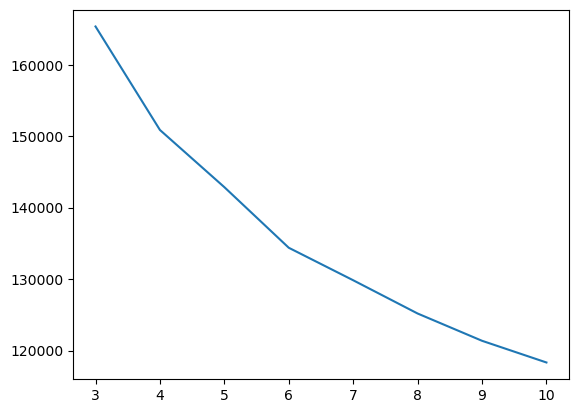

In [47]:
# Basic elbow. 
import matplotlib.pyplot as plt
plt.plot(range(3,11), wcss)

In [58]:
import numpy as np

# How do the clusters break down for different values of K?

for i in range(3, 11):
    _, counts = np.unique(labels[f'{i}_clusters'], return_counts=True)
    print(f'{i} Clusters', counts)

3 Clusters [1089 1914 2451]
4 Clusters [1064 1847 1764  779]
5 Clusters [ 969 1496 1087  680 1222]
6 Clusters [ 725 1347  995  556  948  883]
7 Clusters [ 371 1336  984  540  623  882  718]
8 Clusters [ 371  730 1102  499  743  682  628  699]
9 Clusters [365 720 935 500 736 675 621 450 452]
10 Clusters [364 578 746 472 676 625 610 439 444 500]


In [59]:
# Let's examine the clusters at K=6
labels['6_clusters']
df.label = labels['6_clusters']
df

array([1, 1, 1, ..., 0, 4, 0], dtype=int32)

In [62]:
label_0 = df[df['label']==0]
label_1 = df[df['label']==1]
label_2 = df[df['label']==2]
label_3 = df[df['label']==3]
label_4 = df[df['label']==4]
label_5 = df[df['label']==5]

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,5454.0,2.422442,1.689695,0.00,1.00,2.00,4.0000,5.0
churches,5454.0,1.455746,0.827732,0.00,0.92,1.34,1.8100,5.0
resorts,5454.0,2.320048,1.421576,0.00,1.36,1.91,2.6875,5.0
beaches,5454.0,2.489059,1.247503,0.00,1.54,2.06,2.7400,5.0
parks,5454.0,2.797103,1.309188,0.83,1.73,2.46,4.0975,5.0
theatres,5454.0,2.958904,1.338785,1.12,1.77,2.67,4.3100,5.0
museums,5454.0,2.893423,1.282101,1.11,1.79,2.68,3.8375,5.0
malls,5454.0,3.351476,1.413291,1.12,1.93,3.23,5.0000,5.0
zoo,5454.0,2.541177,1.111398,0.86,1.62,2.17,3.1900,5.0
restaurants,5454.0,3.126542,1.356774,0.84,1.80,2.80,5.0000,5.0


In [71]:
label_0.describe().T.sort_values(by='mean', ascending=False) # Parks, theatres, viewpoints 

,count,mean,std,min,25%,50%,75%,max
view points,725.0,4.819090,0.400481,1.18,5.00,5.00,5.00,5.00
parks,725.0,4.288221,1.133820,0.90,4.12,5.00,5.00,5.00
theatres,725.0,4.063490,1.140821,1.29,2.91,5.00,5.00,5.00
museums,725.0,3.189862,1.107402,1.54,2.34,3.20,4.35,5.00
beaches,725.0,3.128648,1.498332,0.87,1.71,2.58,5.00,5.00
malls,725.0,2.721490,1.007992,1.35,1.78,2.58,3.24,5.00
pubs/bars,725.0,2.691628,1.186360,0.81,1.70,2.44,3.27,5.00
restaurants,725.0,2.655738,1.195649,0.84,1.69,1.84,3.40,5.00
local services,725.0,2.647710,1.524330,0.78,1.57,1.99,4.00,5.00
monuments,725.0,2.497241,1.872873,0.54,0.95,1.31,5.00,5.00


In [72]:
label_1.describe().T.sort_values(by='mean', ascending=False) # Theatres, Museums, Malls

,count,mean,std,min,25%,50%,75%,max
theatres,1347.0,4.326325,0.923065,1.28,3.775,5.00,5.00,5.00
museums,1347.0,3.815093,1.152993,1.34,2.860,4.08,5.00,5.00
parks,1347.0,3.664091,1.159616,0.83,2.660,3.64,5.00,5.00
malls,1347.0,3.649673,1.311142,1.36,2.420,3.27,5.00,5.00
beaches,1347.0,3.194989,1.328556,0.52,2.355,2.79,5.00,5.00
resorts,1347.0,2.782762,1.545407,0.00,1.360,2.41,5.00,5.00
restaurants,1347.0,2.630401,1.063647,0.85,1.770,2.60,2.87,5.00
zoo,1347.0,2.439406,0.900004,0.86,1.810,2.43,2.90,5.00
pubs/bars,1347.0,2.427624,1.016842,0.81,1.565,2.56,2.81,5.00
local services,1347.0,2.047832,0.998767,0.79,1.570,1.75,2.05,5.00


In [73]:
label_2.describe().T.sort_values(by='mean', ascending=False) # malls, restaurants, art galleries 

,count,mean,std,min,25%,50%,75%,max
malls,995.0,4.628925,0.877659,1.35,5.000,5.00,5.000,5.00
restaurants,995.0,4.407839,0.908608,0.90,3.280,5.00,5.000,5.00
art galleries,995.0,3.718955,1.742045,0.51,1.795,5.00,5.000,5.00
museums,995.0,3.405467,1.330287,1.27,2.660,3.14,5.000,5.00
zoo,995.0,3.190513,1.324034,0.89,2.000,3.22,4.150,5.00
pubs/bars,995.0,3.149558,1.428684,0.86,1.800,2.82,5.000,5.00
juice bars,995.0,3.016613,1.626234,0.77,1.470,2.52,5.000,5.00
resorts,995.0,2.835538,1.837419,0.53,1.280,1.92,5.000,5.00
theatres,995.0,2.536653,0.854506,1.25,1.545,2.70,3.010,5.00
beaches,995.0,2.308392,1.189551,0.73,1.470,1.91,2.480,5.00


In [74]:
label_3.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
juice bars,556.0,4.937932,0.440812,0.82,5.0000,5.000,5.0000,5.00
hotels/other lodgings,556.0,4.332644,0.999000,0.90,3.3650,5.000,5.0000,5.00
burger/pizza shops,556.0,4.088327,1.171892,0.90,2.6900,5.000,5.0000,5.00
art galleries,556.0,3.955737,1.766198,0.75,3.1750,5.000,5.0000,5.00
local services,556.0,3.223345,0.856591,1.46,2.6775,3.000,3.3000,5.00
label,556.0,3.000000,0.000000,3.00,3.0000,3.000,3.0000,3.00
malls,556.0,2.985899,1.611893,1.29,1.5500,1.910,5.0000,5.00
pubs/bars,556.0,2.897932,0.420573,1.45,2.6400,2.840,3.2125,5.00
restaurants,556.0,2.738345,0.408179,1.46,2.5375,2.670,2.8200,5.00
zoo,556.0,1.955809,0.522771,1.32,1.5500,1.740,2.5825,4.29


In [75]:
label_4.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
label,948.0,4.000000,0.000000,4.00,4.0000,4.000,4.0000,4.00
view points,948.0,2.633133,1.430377,0.66,1.5900,2.130,3.7125,5.00
resorts,948.0,2.629989,0.924584,0.93,2.0600,2.385,2.6700,5.00
gardens,948.0,2.592690,1.197131,0.71,1.7700,2.285,3.1550,5.00
monuments,948.0,2.447648,1.135695,0.73,1.6900,2.165,3.3200,5.00
bakeries,948.0,2.446783,1.802779,0.00,0.8500,2.090,5.0000,5.00
art galleries,948.0,2.439863,1.737206,0.77,1.0600,1.560,5.0000,5.00
beaches,948.0,2.432215,0.789312,1.01,2.0100,2.215,2.6325,5.00
churches,948.0,2.329251,0.810754,0.76,1.8700,2.205,2.5900,5.00
parks,948.0,2.193376,0.668016,1.14,1.9100,2.040,2.4725,5.00


In [76]:
label_5.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
label,883.0,5.000000,0.000000,5.00,5.000,5.00,5.000,5.0
restaurants,883.0,4.532288,0.697459,0.92,3.920,5.00,5.000,5.0
pubs/bars,883.0,4.479581,0.744645,0.95,3.780,5.00,5.000,5.0
local services,883.0,4.170498,1.467012,0.83,3.870,5.00,5.000,5.0
malls,883.0,3.697384,0.998406,1.38,3.210,3.24,5.000,5.0
zoo,883.0,3.646716,0.821656,1.35,3.180,3.28,4.110,5.0
museums,883.0,2.566614,0.957876,1.29,1.780,2.60,3.200,5.0
theatres,883.0,2.287928,0.988902,1.25,1.600,1.94,2.650,5.0
parks,883.0,2.192695,1.135897,0.88,1.460,1.79,2.045,5.0
burger/pizza shops,883.0,2.097305,1.252200,0.82,1.540,1.66,2.095,5.0
